In [1]:
import copy

import numpy as np
import pytest

from maze_dataset.constants import CoordArray
from maze_dataset.dataset.dataset import (
    register_dataset_filter,
    register_filter_namespace_for_dataset,
)
from maze_dataset.dataset.maze_dataset import (
    MazeDataset,
    MazeDatasetConfig,
    register_maze_filter,
)
from maze_dataset.maze import SolvedMaze
from maze_dataset.utils import bool_array_from_string
from maze_dataset.plotting import plot_dataset_mazes, print_dataset_mazes

In [2]:
a = 5
a+2

7

In [3]:
config = MazeDatasetConfig(name="test", grid_n=3, n_mazes=5)
dataset = MazeDataset.generate(config, gen_parallel=False)

(<Figure size 500x200 with 5 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

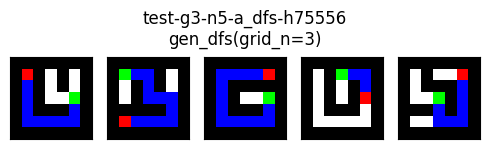

In [11]:
plot_dataset_mazes(dataset)

In [66]:
# dataset.serialize()['mazes']
dataset.mazes[0].solution

array([[1, 2],
       [2, 2],
       [2, 1],
       [2, 0],
       [1, 0],
       [0, 0]])

In [81]:
np.stack([m.connection_list for m in dataset.mazes]) # connection list
np.stack([np.array([m.start_pos, m.end_pos]) for m in dataset.mazes]) # endpoints
lengths = np.fromiter((m.solution.shape[0] for m in dataset.mazes), count=len(dataset) , dtype = np.uint16) # sol'n lengths
max_solution_len = lengths.max()
np.stack([np.pad(m.solution, ((0,max_solution_len - len(m.solution)),(0,0)), constant_values=-1) for m in dataset.mazes]) # solutions
# m = dataset.mazes[0]
# [np.pad(m.solution, ((0,max_solution_length - len(m.solution)),(0,0)), constant_values=-1) for m in dataset.mazes]
# np.fromiter((m for m in [True, False, True]), dtype=bool)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7,) + inhomogeneous part.

In [5]:
s = dataset.serialize_minimal()

In [11]:
s['maze_solutions'].shape

(5, 8, 2)